    year  month product  salesForecast  salesActual forecastError  isAccepted  \
3   2021      1       D             86          120       28,30 %           0   
8   2021      2       D             87           70       24,30 %           0   
13  2021      3       D             56           78       28,20 %           0   
18  2021      4       D             67           94       28,70 %           0   
23  2021      5       D             97           99        2,00 %           1   
28  2021      6       D             99          139       28,80 %           0   
33  2021      7       D             88          123       28,50 %           0   
38  2021      8       D             99           97        2,10 %           1   
43  2021      9       D             77          108       28,70 %           0   
48  2021     10       D             60           84       28,60 %           0   
53  2021     11       D             95           93        2,20 %           1   
58  2021     12       D     

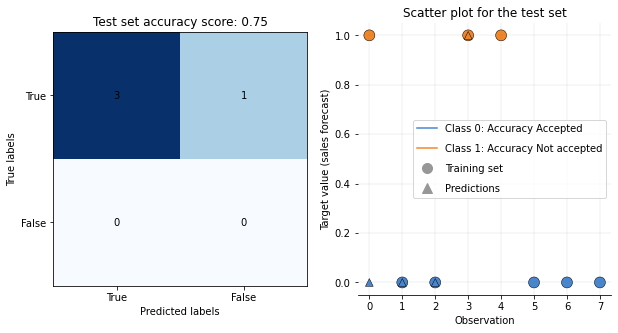

In [1]:
""" ########################

LOGISTIC REGRESSION USING SKLEARN

    Classify products into two categories based on the sales forecast accuracy.

    Questions:
    To which products have to focus on when updating the sales forecast?
    On which product the sales forecast should be checked?

    Steps for logistic regression
    1. Create x and y
    2. Create Train and Test set
    3. Train the model
    4. Make prediction
    5. Evaluate the model

########################### """

from turtle import color, position
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import seaborn as sn

data = pd.DataFrame(pd.read_csv("/Users/Joni/Desktop/Python/GitHub/portfolio/dataScience/logisticRegression/logReg_testData.csv", sep="\;", decimal=",", engine="python"))

# Cleaning the dataset
# Check null values/missing values
data.isnull().sum()

# Calculate metrics for evaluate planning accuracy
# MAD (Mean Absolute Deviation)
# MAPE (Mean Absolute Percent Error)
data["MAD"] = np.absolute(data["salesActual"]-data["salesForecast"])
data["MAPE"] = np.absolute(data["MAD"]/data["salesActual"]*100)

# Select the product (A, B, C, D, E)
product = input("Type in the product. Select from: A, B, C, D or E ")
data = data[data["product"] == product]
print(data)

# Feature variables (independent variable)
x = data[["salesForecast"]].values


# Target variable (dependent variable)
y = data["isAccepted"].values

# Create train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,
                                                            test_size=0.3,
                                                            random_state=100)

# Instantiate the model
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

# Evaluate performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("Model accuracy:", logreg.score(x_test, y_test))

fig = plt.figure(figsize=(10,5))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[0,1])
# ax3 = fig.add_subplot(specs[1,0])
# ax4 = fig.add_subplot(specs[1,1])

# Visualize confusion matrix of the test set
ax1.matshow(conf_matrix, cmap="Blues")
ax1.set_xlabel("Predicted labels")
ax1.set_ylabel("True labels")
ax1.set_xticks([0,1],["True", "False"])
ax1.set_yticks([0,1],["True", "False"])
ax1.xaxis.set_ticks_position("bottom")

sampleTitle = "Test set accuracy score: {0}".format(logreg.score(x_test, y_test))
ax1.set_title(sampleTitle, size=12)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax1.text(x=j, y=i, s=conf_matrix[i,j], va="center", ha="center")

# Create scatter plot of the test set results
# remove all border lines except bottom
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)

ax2.set_title("Scatter plot for the test set", size=12)
ax2.set_xlabel("Observation")
ax2.set_ylabel("Target value (sales forecast)")

# add major gridlines
ax2.grid(color="grey", linestyle="-", linewidth=0.25, alpha=0.5)
train_colors = ["#4786D1" if target <= 0 else "#F28627" for target in y_train]
pred_colors = ["#4786D1" if target <= 0 else "#F28627" for target in y_pred]

# Scatter plot
y_train_len = len(y_train) 
y_pred_len = len(y_pred)
ax2.scatter(np.arange(0, y_train_len), y_train, color=train_colors, marker="o", s=[15*y_train_len], edgecolors="Black", linewidth=0.5)
ax2.scatter(np.arange(0, y_pred_len), y_pred, color=pred_colors, marker="^", s=[15*y_pred_len], edgecolors="Black", linewidth=0.5)

# Customize the legend
legend_items = [Line2D([0], [0], color="#4786D1", markersize=10),
                Line2D([0], [0], color="#F28627", markersize=10),
                Line2D([0], [0], color="w", marker="o", markerfacecolor="#979797", markeredgecolor="#979797", markersize=10),
                Line2D([0], [0], color="w", marker="^", markerfacecolor="#979797", markeredgecolor="#979797", markersize=10)]
ax2.legend(handles=legend_items,
            labels=["Class 0: Accuracy Accepted",
                    "Class 1: Accuracy Not accepted",
                    "Training set",
                    "Predictions"],
                    labelspacing=1,
                    loc="center right")



plt.show()







NameError: name 'plt' is not defined